In [1]:
import numpy as np
import hdf5storage
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

In [2]:
def true_dist(y_true, y_pred):    
    return (np.sqrt(np.square(np.abs(y_pred[:,0]-y_true[:,0]))+
                    np.square(np.abs(y_pred[:,1]-y_true[:,1]))+
                    np.square(np.abs(y_pred[:,2]-y_true[:,2]))))

In [3]:
Data_Foldername = './1_Measured_Data'
Meas_Comb_h =    "%s/h_Estimated_CTW_Train.mat" % (Data_Foldername)
Meas_Comb_r =    "%s/r_Position_CTW_Train.mat" % (Data_Foldername)

h_Estimated = hdf5storage.loadmat(Meas_Comb_h)['h_Estimated']
target_pos  = hdf5storage.loadmat(Meas_Comb_r)['r_Position']

In [4]:
X = np.abs(h_Estimated)
targetPosCluster = target_pos
X = np.reshape(X,newshape=(X.shape[0],X.shape[1]*X.shape[2]))
X_train, X_test, y_train, y_test = train_test_split(
    X, targetPosCluster, test_size=0.1, random_state=0)

In [5]:
neigh = KNeighborsRegressor(n_neighbors=1,p=1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
diff = true_dist(y_pred, y_test)

In [6]:
rmse = np.sqrt(np.mean(diff**2))
print("RMSE = %.3f " % rmse)
print("Average error = %.3f m" % np.mean(diff))

RMSE = 0.161 
Average error = 0.024 m


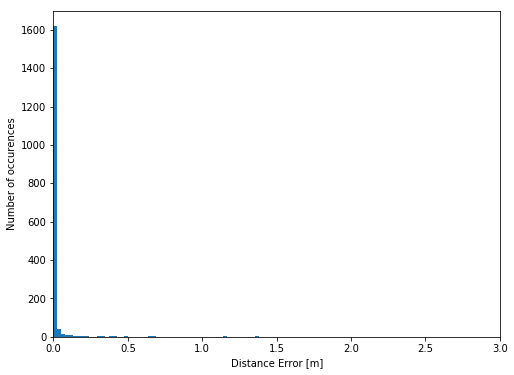

In [7]:
%matplotlib inline
plt.figure(figsize=(8,6))
plt.hist(diff,bins=100)
plt.xlim([0,3])
plt.xlabel('Distance Error [m]')
plt.ylabel('Number of occurences')
plt.savefig('distance_error')


In [8]:
mmPrecision  = np.count_nonzero(diff < 0.001)
cmPrecision  = np.count_nonzero(diff < 0.01)
dmPrecision  = np.count_nonzero(diff < 0.1)
mPrecision   = np.count_nonzero(diff < 1)
m10Precision = np.count_nonzero(diff < 10)
testSamples = diff.shape[0]

print("millimeter precision = %d of %d samples, %3d%%" % 
      (mmPrecision,testSamples,100 * (mmPrecision / testSamples)))
print("centimeter precision = %d of %d samples, %3d%%" % 
      (cmPrecision,testSamples,100 * (cmPrecision / testSamples)))
print("decimeter  precision = %d of %d samples, %3d%%" % 
      (dmPrecision,testSamples,100 * (dmPrecision / testSamples)))
print("meter      precision = %d of %d samples, %3d%%" % 
      (mPrecision,testSamples,100  * (mPrecision / testSamples)))
print("10 meter   precision = %d of %d samples, %3d%%" % 
      (m10Precision,testSamples,100* (m10Precision / testSamples)))

millimeter precision = 1534 of 1749 samples,  87%
centimeter precision = 1577 of 1749 samples,  90%
decimeter  precision = 1683 of 1749 samples,  96%
meter      precision = 1736 of 1749 samples,  99%
10 meter   precision = 1749 of 1749 samples, 100%


### Investigate with varying number of antennas

In [9]:
numberOfAntennas = [1,2,4,8,16]
rmse = np.zeros(shape=(len(numberOfAntennas),))
mean_error = np.zeros(shape=(len(numberOfAntennas),))

for idx,antenna in enumerate(numberOfAntennas):
    X = np.abs(h_Estimated[:,0:antenna])
    targetPosCluster = target_pos[:]
    X = np.reshape(X,newshape=(X.shape[0],X.shape[1]*X.shape[2]))
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, targetPosCluster, test_size=0.1, random_state=0)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    diff   = true_dist(y_pred, y_test)
    rmse[idx]       = np.sqrt(np.mean(diff**2))
    mean_error[idx] = np.mean(diff)
    print("Number of antennas = %d " % antenna)
    print("RMSE = %.3f " % rmse[idx])
    print("Average error = %.3f m \n" % np.mean(diff))

Number of antennas = 1 
RMSE = 1.025 
Average error = 0.580 m 

Number of antennas = 2 
RMSE = 0.678 
Average error = 0.256 m 

Number of antennas = 4 
RMSE = 0.311 
Average error = 0.061 m 

Number of antennas = 8 
RMSE = 0.193 
Average error = 0.032 m 

Number of antennas = 16 
RMSE = 0.161 
Average error = 0.024 m 



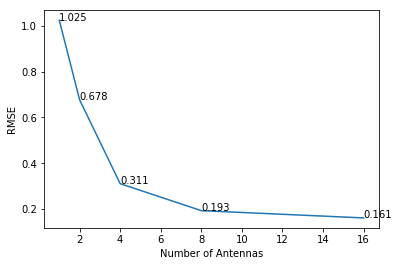

In [10]:
fig, ax = plt.subplots()
ax.plot(numberOfAntennas,rmse)

for i, txt in enumerate(rmse):
    ax.annotate("%.3f" % rmse[i], (numberOfAntennas[i],rmse[i]))
ax.set_xlabel('Number of Antennas')
ax.set_ylabel('RMSE')
plt.savefig('rmse_antennas')


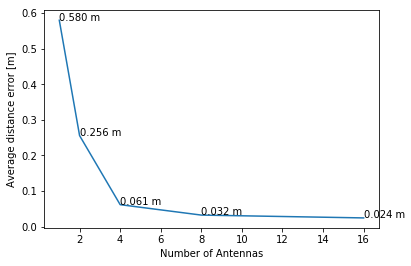

In [11]:
fig, ax = plt.subplots()
ax.plot(numberOfAntennas,mean_error)

for i, txt in enumerate(mean_error):
    ax.annotate("%.3f m" % mean_error[i], (numberOfAntennas[i],mean_error[i]))
ax.set_xlabel('Number of Antennas')
ax.set_ylabel('Average distance error [m]')
plt.savefig('average_error_antennas')
